In [1]:
from medialib import *
initialize()
import pandas as pd
import numpy as np

initialX=10
initialY=200 
x1=40
y1=230
tileSize=30
gamepoint=0

df=pd.read_csv("letter-recognition.csv",header=None)
df=df.iloc[:,2:6]
df.columns=["fish_x","fish_y","monster_x","monster_y"]
df=df[df["fish_x"]!=df["monster_x"] ]
df=df[df["fish_y"]!=df["monster_y"] ]
fish=df[ df["fish_x"].between(1,3) & df["fish_y"].between(1,8) ]
monster=df[df["monster_x"].between(1,3) & df["monster_y"].between(8,16) ]
monster=monster[["monster_x","monster_y"]]
monster=monster.drop_duplicates()


fish=fish[["fish_x","fish_y"]]
fish=fish.drop_duplicates()
fish=fish.sample(n=11,random_state=223)
monster=monster.sample(n=5,random_state=235)
print(fish)
print(monster)
fish=fish.to_numpy()
monster=monster.to_numpy()

background=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
            ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','X'],
            ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','E','_','X'],
            ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','X'],
            ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 

for x,y in fish:
    background[x][y]='F'
for x,y in monster:
    background[x][y]='M'
    
def draw_scene():
    global x1
    global y1
    global initialX
    global initialY
    tileY=initialY
    
    for j in range(len(background)):
        tileX=initialX    
        for i in background[j]:
            if i=='X':
                draw('MazeGame_imgs\X.png',tileX,tileY)
            elif i=='M':
                draw('MazeGame_imgs\M.png',tileX,tileY)
            elif i=='F':
                draw('MazeGame_imgs\F.png',tileX,tileY)
            elif i=='E':
                draw('MazeGame_imgs\E.png',tileX,tileY)
            elif i=='_':
                draw('MazeGame_imgs\_.png',tileX,tileY)           
            tileX+=tileSize
        tileY+=tileSize
    draw('MazeGame_imgs\C.png',x1,y1) 
draw_scene()
print(background)
wait_mouse_leftclick()
all_done()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


ValueError: a must be greater than 0 unless no samples are taken

In [25]:
## the following line is just MAGIC ##############################################
## we need it to be able to draw images on the screen ############################
from medialib import *
import datetime
import time
import pandas as pd
initialize()

##  each item of the list representing the background of each row
background=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
            ['X','_','F','F','_','_','M','_','_','F','F','_','F','_','_','_','_','X'],
            ['X','F','_','_','M','_','M','F','_','_','F','_','_','M','_','E','F','X'],
            ['X','_','_','F','_','_','_','_','_','F','M','_','F','_','F','_','_','X'],
            ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 

initialX=10
initialY=200 
x1=40
y1=230
tileSize=30
gamepoint=0
flag_monster=False
flag_exit=False
game_score_file=pd.read_csv("Game.csv")
game_latest_score=game_score_file.tail(1)["Points"].array[0]
#print("fjfjf", game_latest_score.array[0], "dkkdkd")


def convert_screenX_to_gridX(screenXPosition):
    global initialX
    return int((screenXPosition-initialX)/tileSize)

def convert_screenY_to_gridY(screenYPosition):
    global initialY
    return int((screenYPosition-initialY)/tileSize)
    
#Function to update grid after kitten reaches fish,Monster and Exit
def update_grid(x1,y1):
    global tileSize
    gridx=convert_screenX_to_gridX(x1)
    gridy=convert_screenY_to_gridY(y1)
        
    if background[gridy][gridx]=='M':
        clear()
        global flag_monster
        flag_monster=True
        text("Game Over", 10,370,20,r=255,b=0,g=0)
    elif background[gridy][gridx]=='E':
        clear()
        global flag_exit
        flag_exit=True
       # draw('MazeGame_imgs\you_win.png',100,150)
   
    
#Function to update Points after kitten eats fishes
    
def check_player_collected_fish(x1,y1):
    global tileSize
    gridx=convert_screenX_to_gridX(x1)
    gridy=convert_screenY_to_gridY(y1)
    if background[gridy][gridx]=='F':
        background[gridy][gridx]='_'
        global gamepoint
        gamepoint+=1
        
        
#Function to draw the background and the cat
def draw_scene():
    global x1
    global y1
    global initialX
    global initialY
    tileY=initialY
    
    for j in range(len(background)):
        tileX=initialX    
        for i in background[j]:
            if i=='X':
                draw('MazeGame_imgs\X.png',tileX,tileY)
            elif i=='M':
                draw('MazeGame_imgs\M.png',tileX,tileY)
            elif i=='F':
                draw('MazeGame_imgs\F.png',tileX,tileY)
            elif i=='E':
                draw('MazeGame_imgs\E.png',tileX,tileY)
            elif i=='_':
                draw('MazeGame_imgs\_.png',tileX,tileY)           
            tileX+=tileSize
        tileY+=tileSize
        
    draw('MazeGame_imgs\C.png',x1,y1)

def on_successfull_move_command():
    global x1
    global y1
    check_player_collected_fish(x1,y1)
    update_grid(x1,y1)
    
def check_move_is_valid(potentialNewCatX, potentialNewCatY):  
    gridx=convert_screenX_to_gridX(potentialNewCatX)
    gridy=convert_screenY_to_gridY(potentialNewCatY)
    gridx=int((potentialNewCatX-10)/tileSize)
    
    # this checks if the next move is out of bounds on the multi dimensional array
    # it checks the Y value first to short circuit if the values are out of bounds before checking the inner part of the array
    if(gridy < 0 or gridy >= len(background) or gridx < 0 or gridx >= len(background[gridy])):
        text("Out of bounds illegal move", 10,370,14,r=255,b=0,g=0)
        return False
    
    if background[gridy][gridx]=='X':
        text("Hit a wall cant move further", 10,370,14,r=255,b=0,g=0)
        return False
    
    return True

def move_command(newXPosition, newYPosition):
    global x1
    global y1
    if(check_move_is_valid(newXPosition, newYPosition)):
        #apply valid move to the global player position
        x1=newXPosition
        y1=newYPosition
        on_successfull_move_command()
            


#loop for moving the kitten and updating grid and points
starttime=datetime.datetime.now()
draw_scene()

while flag_exit==False and flag_monster==False:
    
    text("last game score is" , 10,400,14,r=255,b=0,g=0)
    #print(game_latest_score)
    text(str(game_latest_score), 10,430,14,r=255,b=0,g=0)
    userinput = wait_key_press()
    clear()
    if userinput=='a':
        move_command(x1-tileSize, y1)
    elif userinput=='d':  
        move_command(x1+tileSize, y1)     
    elif userinput=='w':
        move_command(x1, y1-tileSize)
    elif userinput=='s':
        move_command(x1, y1+tileSize)
    elif userinput=='q':
        clear()
        break
    else:
        text("This is a illegal input!!!", 10,410,14,r=255,b=0,g=0)
    
    draw_scene()
    
    text(str(gamepoint), 10,150,14,r=255,b=0,g=0)
    if flag_exit==True:
        draw('MazeGame_imgs\you_win.png',100,150)
    if flag_monster==True:
        text("Game Over", 10,450,20,r=255,b=0,g=0)
    

     
endtime=datetime.datetime.now()  
time_diff=endtime-starttime
file=open('game.csv','a')
file.write(str(gamepoint) + "," + str(datetime.datetime.now())  + "," + str(time_diff.total_seconds())+ "\n")
file.close()



wait_mouse_leftclick()
all_done()

In [17]:
import pandas as pd
game_score_file=pd.read_csv("Game.csv")
game_score_file.head()
#game_score_file["Points"]

game_score_file.dtypes
#print(game_score_file["Points"].tail())

Points       float64
Date          object
TimeTaken    float64
dtype: object

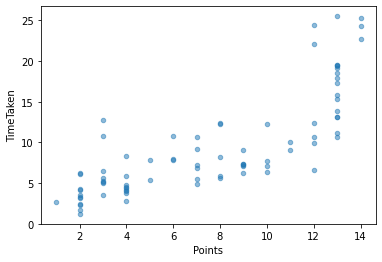

In [13]:
import matplotlib.pyplot as plt
game_score_file.plot.scatter(x="Points", y="TimeTaken", alpha=0.5)


plt.show()

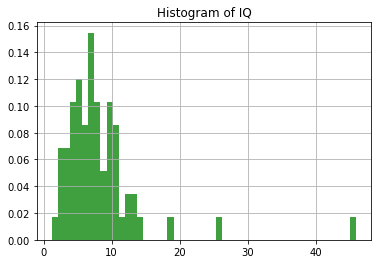

In [22]:
plt.hist(game_score_file["TimeTaken"],50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

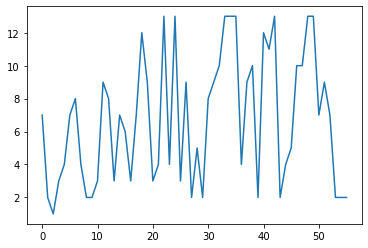

In [41]:
game_score_file["Points"].plot()


plt.show()

In [18]:
df=pd.read_csv("letter-recognition.csv",header=None)
df=df.iloc[:,2:6]
df.columns=["monster_x","monster_y","fish_x","fish_y"]

fish=df[["fish_x","fish_y"]]
fish=fish[ df.fish_x<5]

print(fish)

       fish_x  fish_y
4           1       1
6           4       4
7           2       1
8           4       2
15          4       3
...       ...     ...
19985       4       5
19989       2       1
19991       4       2
19995       3       2
19998       2       1

[6829 rows x 2 columns]


In [6]:
from medialib import *
#initialize()
import pandas as pd
import numpy as np

df=pd.read_csv("letter-recognition.csv",header=None)
df=df.iloc[:,2:6]
df.columns=["fish_x","fish_y","monster_x","monster_y"]
fish=df[ df["fish_x"].between(1,3) & df["fish_y"].between(1,16) ]
monster=df[df["monster_x"].between(1,3) & df["monster_y"].between(1,16) ]
monster=monster[["monster_x","monster_y"]]
monster=monster.drop_duplicates()
monster=monster.sample(n=5,random_state=4)

fish=fish[["fish_x","fish_y"]]
fish=fish.drop_duplicates()
fish=fish.sample(n=11,random_state=4)
print(fish)
print(monster)
fish=fish.to_numpy()
monster=monster.to_numpy()

      fish_x  fish_y
64         3       4
19         2       3
4453       2       7
383        2       2
20         3       2
4          1       3
1226       3       1
1018       1       5
189        2       1
1079       1       1
130        1       4
      monster_x  monster_y
19            3          1
64            1          2
256           3          3
16            3          2
1022          2          3
